In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [73]:
import matplotlib

print(np.__version__)
print(matplotlib.__version__)

2.1.3
3.10.0


In [46]:
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

df = pd.read_csv('Titanic-Dataset.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (891, 12)

First 5 rows:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [47]:
print("Dataset Info:")
df.info()

print("\nMissing Values:")
df.isnull().sum()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [49]:
# ## Data Cleaning and Preprocessing

# Handle missing values
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

# Cabin: Too many missing values, we'll drop this column
df = df.drop('Cabin', axis=1)

# Embarked: Fill with mode (most common value)
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

# Fare: One missing value, fill with median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Verify no more missing values
print("Missing values after cleaning:")
df.isnull().sum()

Missing values after cleaning:


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [50]:
# Create new features that might be useful for analysis
# Family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Is alone
df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

# Age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])

# Title from name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Display the updated dataframe
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  IsAlone  \
0      0         A/5 21171   7.2500        S           2        0   
1      0          PC 17599  71.2833        C           2        0   
2      0  STON/O2. 3101282   7.9250        S           1        1   
3      0            113803  53.1000        S           2        0   
4      0            373450   8.0500        S           1        1   

      AgeGroup Title  
0        Adult    Mr  
1  Middle-aged   Mrs  
2        Adult  Miss  
3        Adult   Mrs  
4        Adult    Mr

In [51]:
# ## Exploratory Data Analysis

# Overall survival rate
overall_survival = df['Survived'].mean() * 100
print(f"Overall Survival Rate: {overall_survival:.2f}%")

# Survival by gender
gender_survival = df.groupby('Sex')['Survived'].mean() * 100
print("\nSurvival by Gender:")
print(gender_survival)

Overall Survival Rate: 38.38%

Survival by Gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


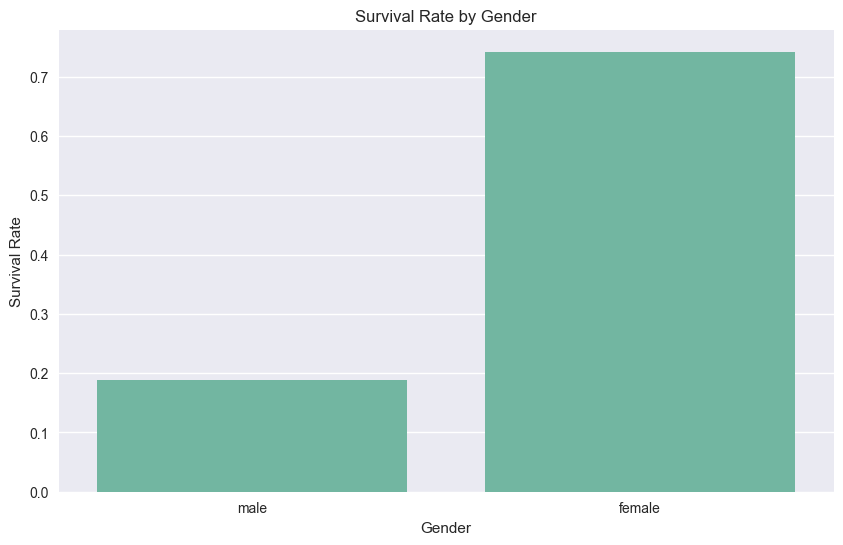

In [52]:
# Visualize survival by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()

Survival by Passenger Class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


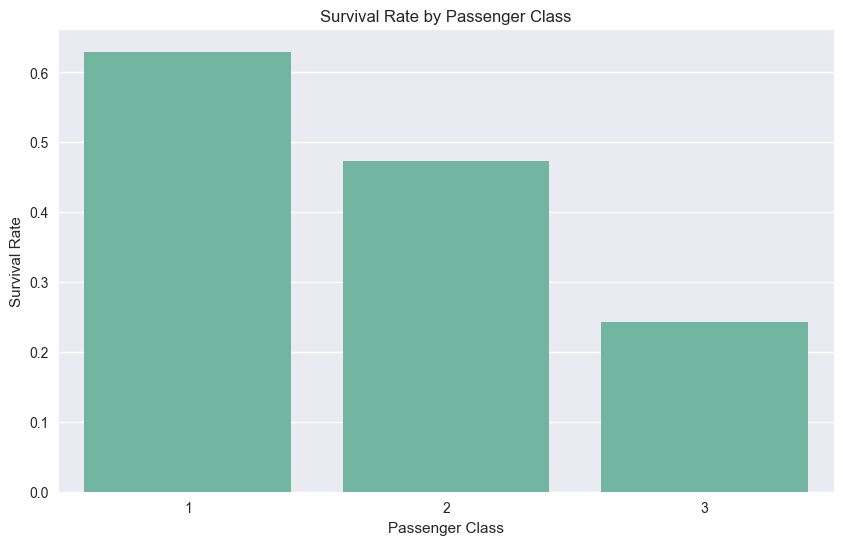

In [53]:
# Survival by passenger class
class_survival = df.groupby('Pclass')['Survived'].mean() * 100
print("Survival by Passenger Class:")
print(class_survival)

plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df,errorbar=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

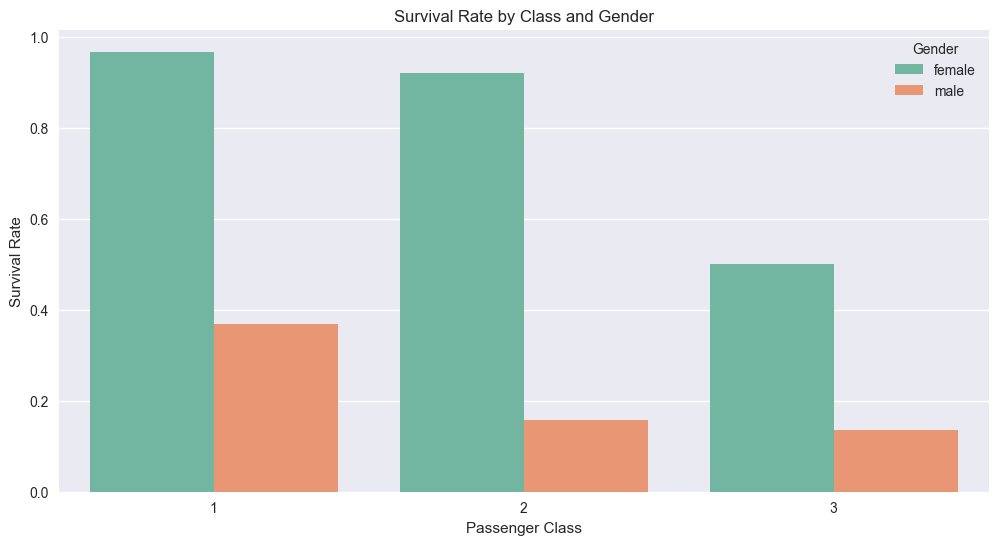

In [54]:
# Survival by gender and class combination
plt.figure(figsize=(12, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, errorbar=None)
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.legend(title='Gender')
plt.show()

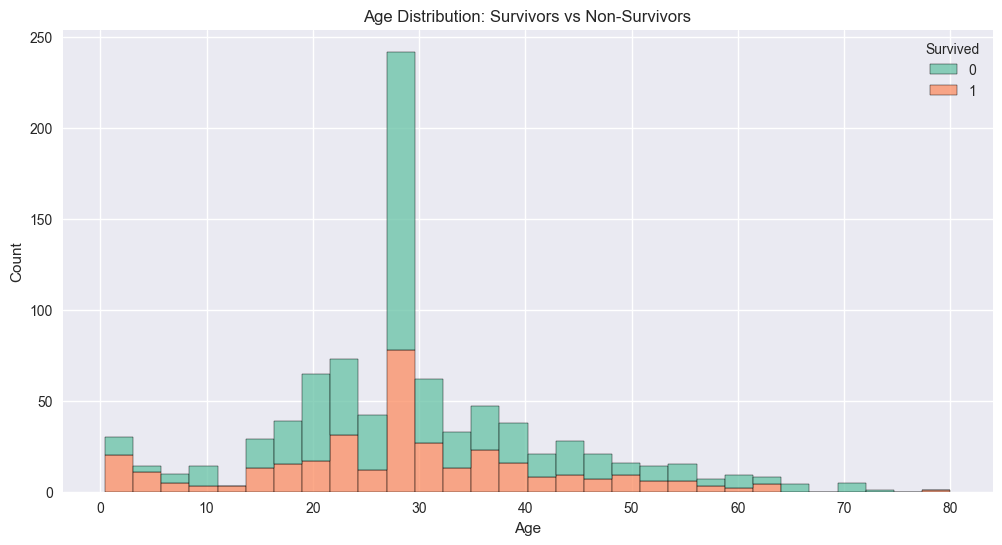

In [55]:
# Age distribution of survivors vs non-survivors
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age Distribution: Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

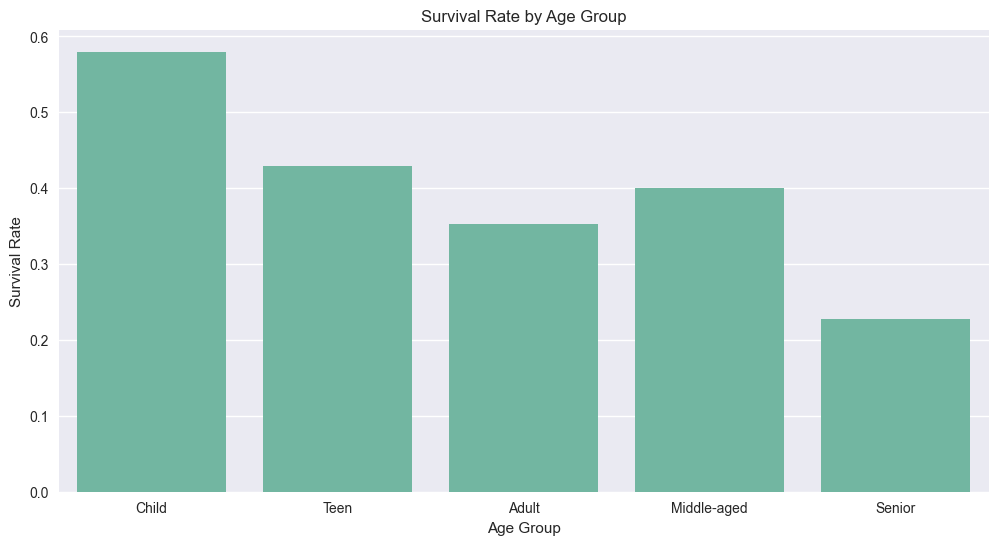

In [56]:
# Survival by age groups
plt.figure(figsize=(12, 6))
sns.barplot(x='AgeGroup', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.show()

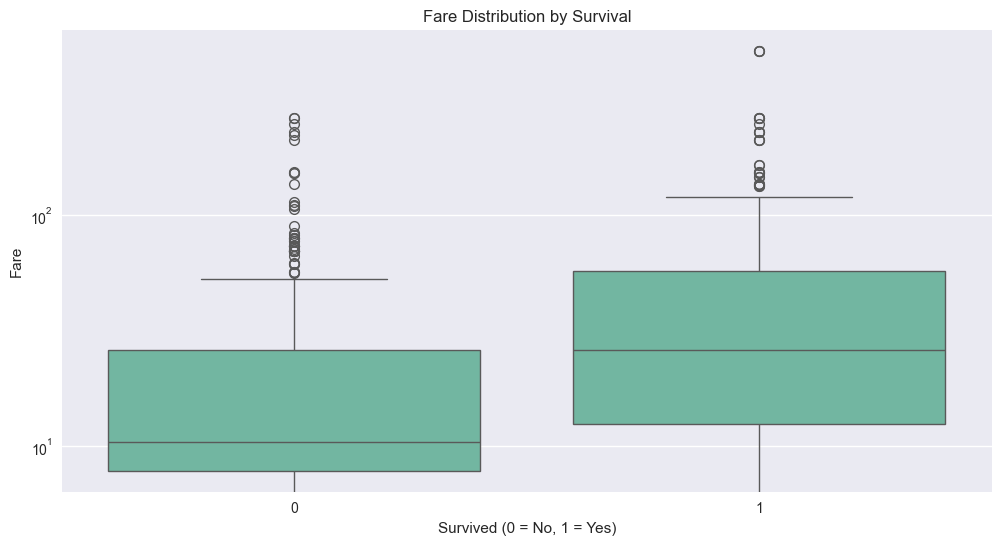

In [57]:
# Fare distribution by survival
plt.figure(figsize=(12, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.ylabel('Fare')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.yscale('log')  # Using log scale due to outliers
plt.show()

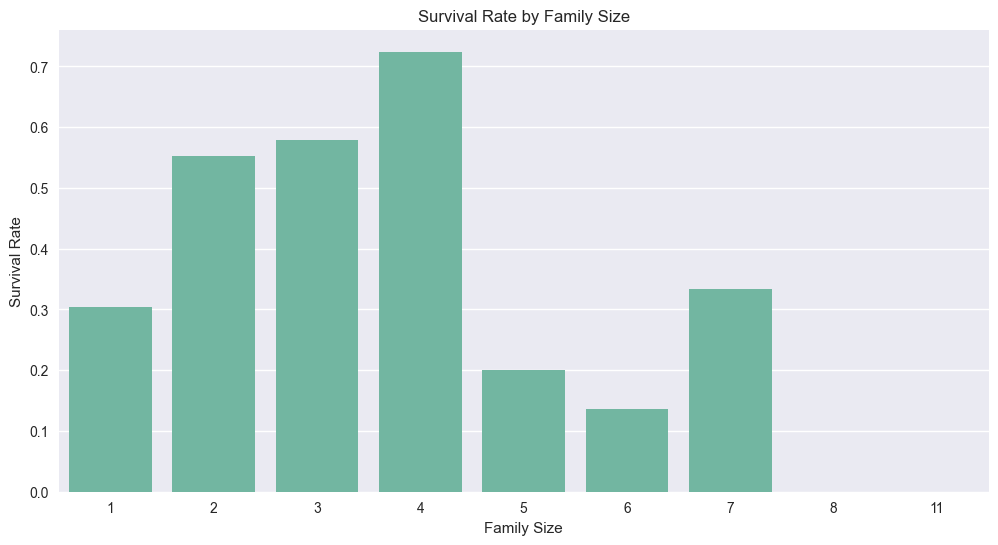

In [58]:
# Survival by family size
plt.figure(figsize=(12, 6))
sns.barplot(x='FamilySize', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.xlabel('Family Size')
plt.show()

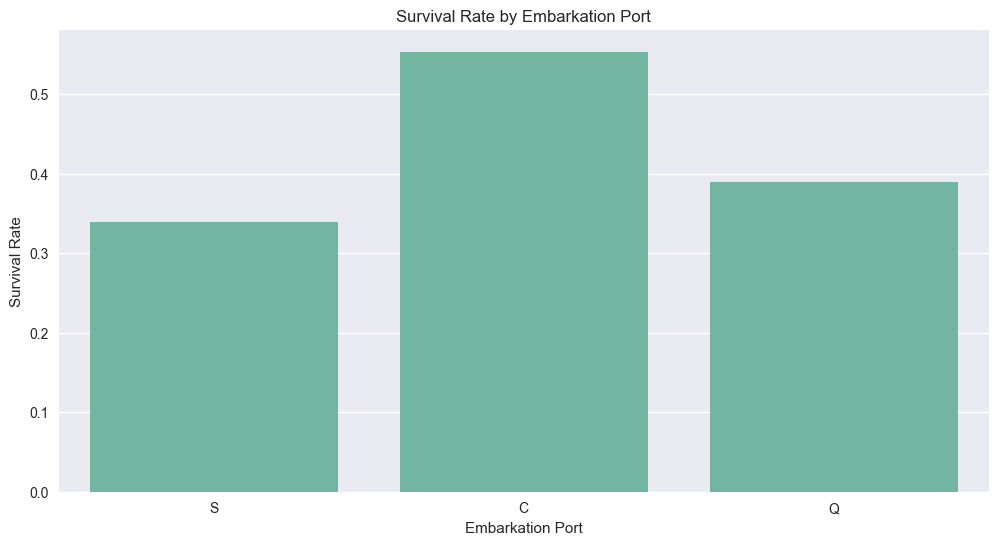

In [59]:
# Survival by embarkation port
plt.figure(figsize=(12, 6))
sns.barplot(x='Embarked', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Survival Rate')
plt.xlabel('Embarkation Port')
plt.show()

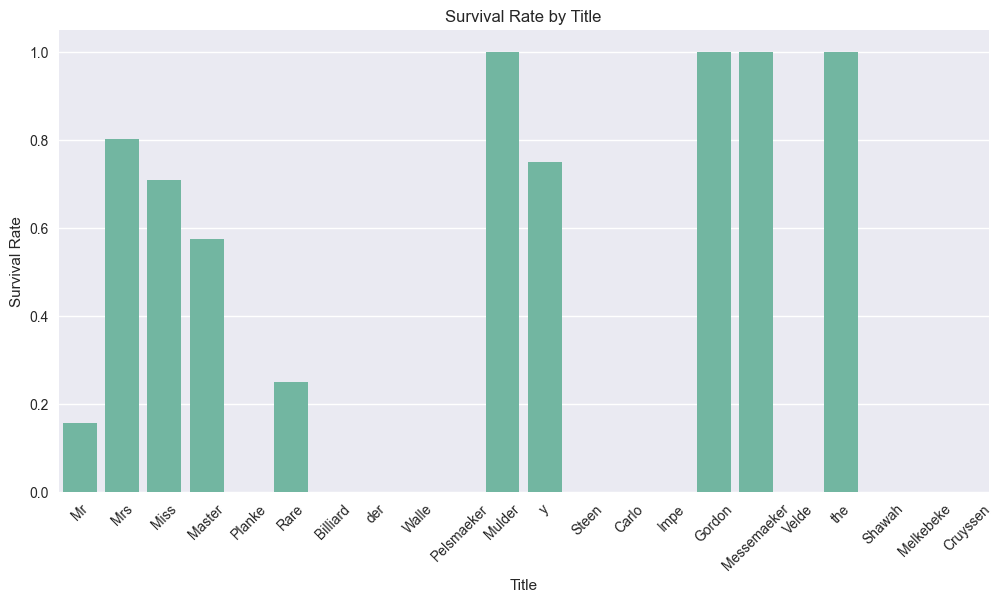

In [60]:
# Survival by title
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Rate')
plt.xlabel('Title')
plt.xticks(rotation=45)
plt.show()

In [61]:
# ## Statistical Analysis

# Chi-square test for gender and survival
contingency_table = pd.crosstab(df['Sex'], df['Survived'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test for Gender vs Survival: p-value = {p_value:.4f}")

# Chi-square test for class and survival
contingency_table = pd.crosstab(df['Pclass'], df['Survived'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test for Class vs Survival: p-value = {p_value:.4f}")

# T-test for age difference between survivors and non-survivors
survivors_age = df[df['Survived'] == 1]['Age'].dropna()
non_survivors_age = df[df['Survived'] == 0]['Age'].dropna()
t_stat, p_value = stats.ttest_ind(survivors_age, non_survivors_age)
print(f"T-test for Age difference: p-value = {p_value:.4f}")

# T-test for fare difference between survivors and non-survivors
survivors_fare = df[df['Survived'] == 1]['Fare'].dropna()
non_survivors_fare = df[df['Survived'] == 0]['Fare'].dropna()
t_stat, p_value = stats.ttest_ind(survivors_fare, non_survivors_fare)
print(f"T-test for Fare difference: p-value = {p_value:.4f}")

Chi-square test for Gender vs Survival: p-value = 0.0000
Chi-square test for Class vs Survival: p-value = 0.0000
T-test for Age difference: p-value = 0.0528
T-test for Fare difference: p-value = 0.0000


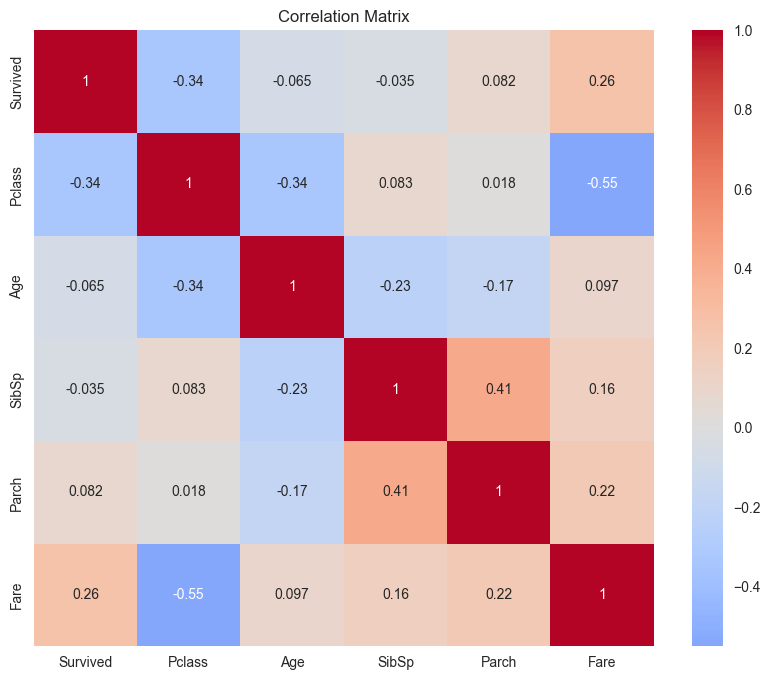

In [62]:
# ## Correlation Analysis

# Calculate correlation matrix
correlation_matrix = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Survival Rate by Class and Gender:
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


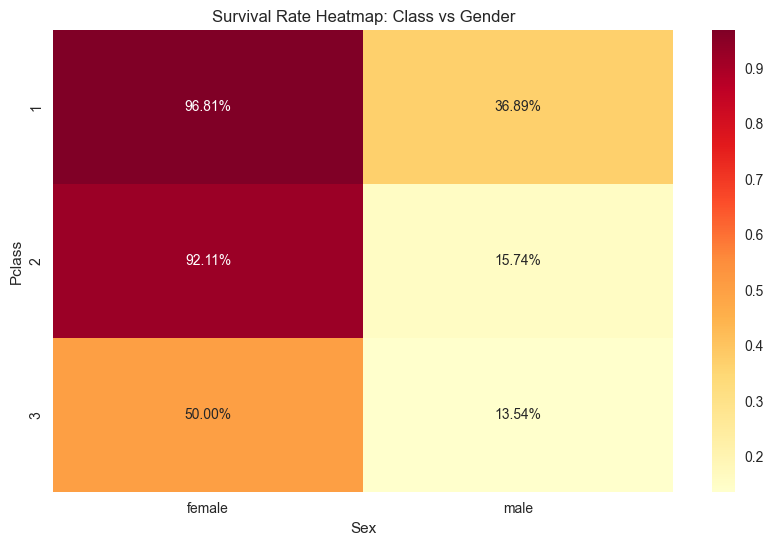

In [63]:
# ## Advanced Analysis: Survival Probability by Multiple Factors

# Create a pivot table for survival rates by class and gender
pivot_table = df.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
print("Survival Rate by Class and Gender:")
print(pivot_table)

# Visualize with heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('Survival Rate Heatmap: Class vs Gender')
plt.show()

In [64]:
# ## Machine Learning Preparation 

# For those interested in predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Prepare data for machine learning
ml_df = df.copy()

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Sex', 'Embarked', 'Title', 'AgeGroup']
for col in categorical_cols:
    le = LabelEncoder()
    ml_df[col] = le.fit_transform(ml_df[col].astype(str))
    label_encoders[col] = le

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']
X = ml_df[features]
y = ml_df['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (712, 10)
Test set size: (179, 10)


In [65]:
# ## Key Findings Summary

print("=== TITANIC SURVIVAL ANALYSIS SUMMARY ===\n")

# Overall statistics
total_passengers = len(df)
survivors = df['Survived'].sum()
survival_rate = survivors / total_passengers * 100

print(f"Total Passengers: {total_passengers}")
print(f"Survivors: {survivors}")
print(f"Overall Survival Rate: {survival_rate:.2f}%\n")

# Key factors
print("Key Factors Influencing Survival:")
print(f"1. Gender: Female survival rate: {gender_survival['female']:.2f}% vs Male: {gender_survival['male']:.2f}%")
print(f"2. Class: 1st class: {class_survival[1]:.2f}%, 2nd: {class_survival[2]:.2f}%, 3rd: {class_survival[3]:.2f}%")

# Family impact
family_impact = df.groupby('IsAlone')['Survived'].mean() * 100
print(f"3. Alone vs With Family: Alone: {family_impact[1]:.2f}%, With Family: {family_impact[0]:.2f}%")

# Age impact
child_survival = df[df['AgeGroup'] == 'Child']['Survived'].mean() * 100
print(f"4. Children Survival Rate: {child_survival:.2f}%")

# Most vulnerable group
worst_group = df[(df['Pclass'] == 3) & (df['Sex'] == 'male')]
worst_survival = worst_group['Survived'].mean() * 100
print(f"5. Most vulnerable group (3rd class males): {worst_survival:.2f}% survival rate")

print("\nThe analysis confirms the 'women and children first' protocol was followed, with class privilege playing a significant role in survival chances.")

=== TITANIC SURVIVAL ANALYSIS SUMMARY ===

Total Passengers: 891
Survivors: 342
Overall Survival Rate: 38.38%

Key Factors Influencing Survival:
1. Gender: Female survival rate: 74.20% vs Male: 18.89%
2. Class: 1st class: 62.96%, 2nd: 47.28%, 3rd: 24.24%
3. Alone vs With Family: Alone: 30.35%, With Family: 50.56%
4. Children Survival Rate: 57.97%
5. Most vulnerable group (3rd class males): 13.54% survival rate

The analysis confirms the 'women and children first' protocol was followed, with class privilege playing a significant role in survival chances.


In [78]:
# Generate the profiling report
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Titanic Dataset Profiling Report")

# Display the report in the notebook
profile.to_notebook_iframe()

Render HTML: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.12s/it]


In [79]:
# Save the report to an HTML file
profile.to_file("sample.html")

Export report to file: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 51.76it/s]
